# cars data set (kaggle competation season 4 episode 9)
link : https://www.kaggle.com/competitions/playground-series-s4e9/overview

load the data set and the necessary libraries 

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# Load the dataset
train_data = pd.read_csv('C:/Users/DELL/Desktop/scikit/cars_data_set_new/train.csv')
test_data = pd.read_csv('C:/Users/DELL/Desktop/scikit/cars_data_set_new/test.csv')

# Display the first few rows
train_data.sample(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
169124,169124,Hyundai,Veloster Base,2013,800,Gasoline,132.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Gray,Gray,At least 1 accident or damage reported,Yes,11400
105307,105307,Land,Rover Range Rover Velar P250 SE R-Dynamic,2019,62000,Gasoline,247.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes,25900
141040,141040,Nissan,350Z NISMO,2011,76000,Gasoline,306.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Black,Black,None reported,Yes,22500
105097,105097,Ford,F-150 XLT,2021,23647,Gasoline,2.7L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Agate Black Metallic,Black Onyx,None reported,NaN,37405
125033,125033,Ford,Utility Police Interceptor Base,2011,64552,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Silver,Black,None reported,Yes,39900


In [33]:
#shape
train_data.shape

(188533, 13)

In [34]:
# Get a summary of the dataset
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,188533.0,94266.000000,54424.933488,0.0,47133.0,94266.0,141399.0,188532.0
model_year,188533.0,2015.829998,5.660967,1974.0,2013.0,2017.0,2020.0,2024.0
milage,188533.0,65705.295174,49798.158076,100.0,24115.0,57785.0,95400.0,405000.0
price,188533.0,43878.016178,78819.522254,2000.0,17000.0,30825.0,49900.0,2954083.0


In [35]:
#transforming to data frame 
train_data=pd.DataFrame(train_data)

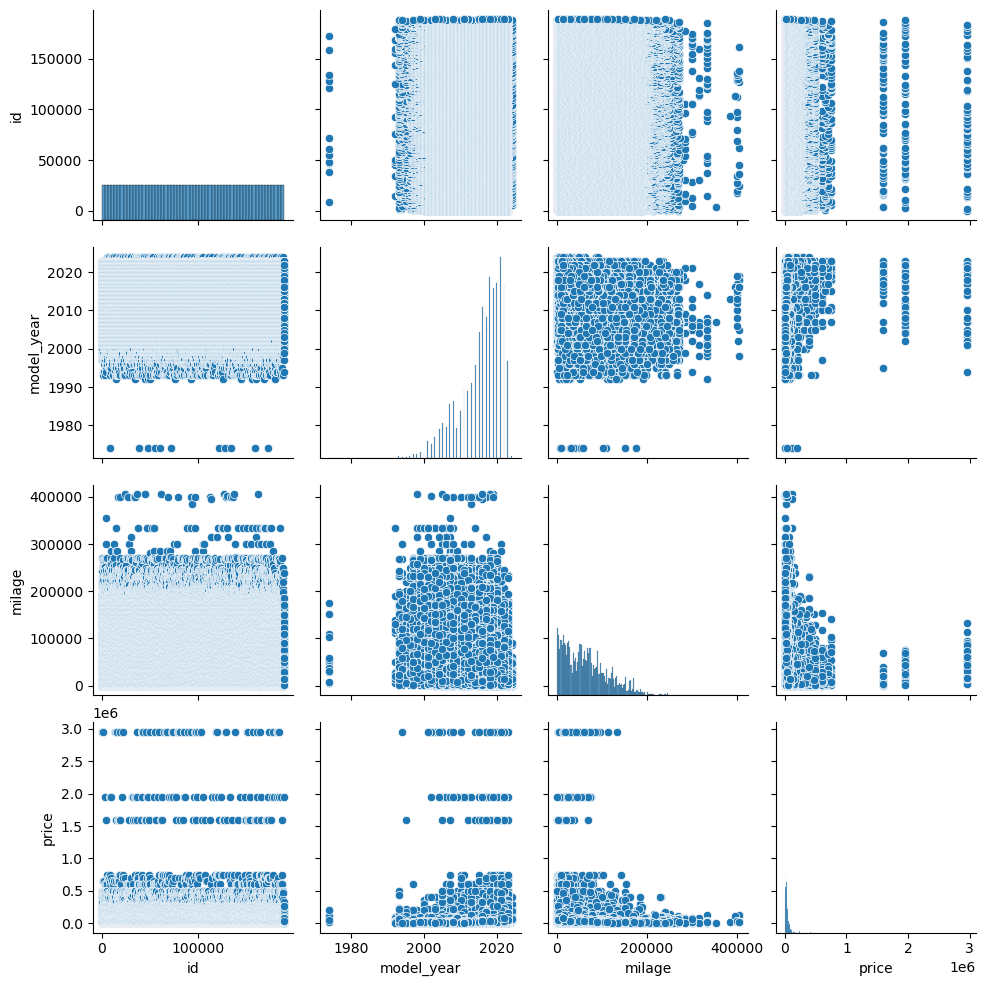

In [36]:
#rough over view to find potential relationships btw features 
sns.pairplot(train_data)

<Axes: xlabel='price', ylabel='milage'>

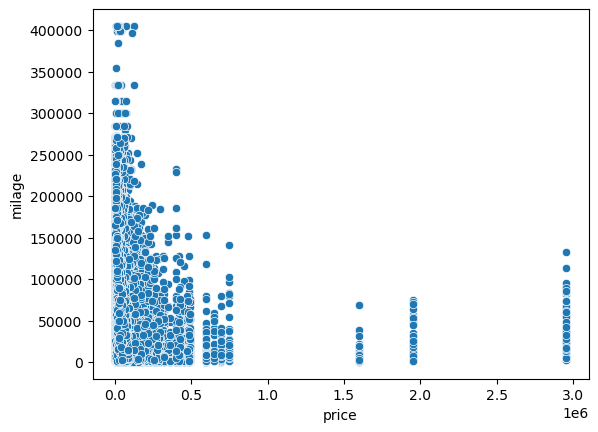

In [37]:
#price and milage seem to inversly propotional to one another 
sns.scatterplot(y=train_data['milage'],x=train_data['price'],)

<Axes: xlabel='milage', ylabel='model_year'>

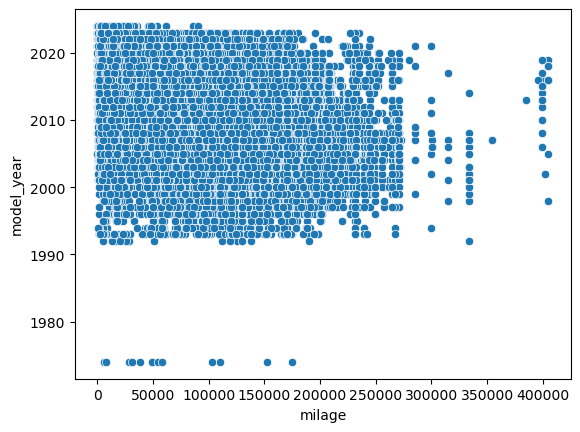

In [38]:
#while the cars that are older  semm to be having more milage/total travelled distance  
sns.scatterplot(y=train_data['model_year'],x=train_data['milage'],)

<Axes: xlabel='price', ylabel='model_year'>

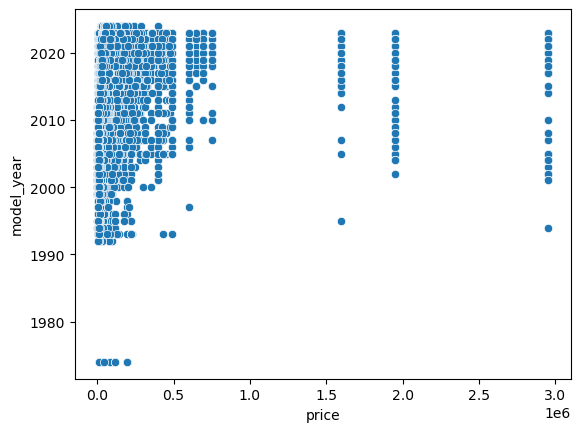

In [39]:
#models  closer to  the present year(2024) are more expensive while vintage cars are also expensive 
sns.scatterplot(y=train_data['model_year'],x=train_data['price'],)

In [40]:
#checking for missing values
train_data.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

# Dropping of missing vlaues 
Replacing fuel type and accident details and celan_title maybe cause issues later as mean and median are of not much use here  so  its better to delete/drop them.  

In [41]:
# Drop rows with any missing values
train_data_cleaned = train_data.dropna()

# Display the cleaned DataFrame
train_data_cleaned.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

sucesfully dropped missing values , saving the changes 

In [42]:
# Drop rows with any missing values and update the original DataFrame
train_data.dropna(inplace=True)

# Display the updated DataFrame
print(train_data)

            id          brand                     model  model_year  milage  \
0            0           MINI             Cooper S Base        2007  213000   
1            1        Lincoln                     LS V8        2002  143250   
2            2      Chevrolet         Silverado 2500 LT        2002  136731   
3            3        Genesis          G90 5.0 Ultimate        2017   19500   
4            4  Mercedes-Benz               Metris Base        2021    7388   
...        ...            ...                       ...         ...     ...   
188527  188527      Chevrolet                Camaro Z28        1999  110000   
188528  188528       Cadillac     Escalade ESV Platinum        2017   49000   
188529  188529  Mercedes-Benz  AMG C 43 AMG C 43 4MATIC        2018   28600   
188530  188530  Mercedes-Benz    AMG GLC 63 Base 4MATIC        2021   13650   
188532  188532        Porsche                Macan Base        2016   59500   

            fuel_type                              

In [43]:
#taking a better look at the data 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162610 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            162610 non-null  int64 
 1   brand         162610 non-null  object
 2   model         162610 non-null  object
 3   model_year    162610 non-null  int64 
 4   milage        162610 non-null  int64 
 5   fuel_type     162610 non-null  object
 6   engine        162610 non-null  object
 7   transmission  162610 non-null  object
 8   ext_col       162610 non-null  object
 9   int_col       162610 non-null  object
 10  accident      162610 non-null  object
 11  clean_title   162610 non-null  object
 12  price         162610 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 17.4+ MB


In [44]:
#looking at all the brands as there are too many models 
train_data['brand'].unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Cadillac', 'Land', 'GMC', 'Toyota', 'Hyundai',
       'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'Hummer', 'Alfa',
       'INFINITI', 'Jeep', 'Porsche', 'Honda', 'Lexus', 'Dodge', 'Nissan',
       'Jaguar', 'Kia', 'Mitsubishi', 'Rolls-Royce', 'Maserati',
       'Pontiac', 'Saturn', 'Bentley', 'Tesla', 'Mazda', 'Subaru',
       'Ferrari', 'Aston', 'Acura', 'Lamborghini', 'Chrysler', 'RAM',
       'McLaren', 'Lucid', 'Lotus', 'Scion', 'Plymouth', 'Suzuki', 'FIAT',
       'Saab', 'Bugatti', 'Mercury', 'Karma', 'Maybach', 'Polestar',
       'smart'], dtype=object)

In [45]:
#looking at mean price of all the car, models as there were few very expensive cars for  btoh less and high milage 
train_data_cleaned.groupby('brand')['price'].mean().sort_values(ascending=False)

brand
Bugatti          176080.000000
Lamborghini      141608.376000
Rolls-Royce      134177.188100
Bentley          125603.946640
McLaren          116722.409574
Ferrari          109615.918819
Aston            105740.069444
Rivian            68113.070588
Lucid             66349.941176
Porsche           65813.648532
Maserati          56797.172249
Maybach           53566.333333
Genesis           52206.617433
Tesla             50809.854227
Land              50485.347334
Alfa              48740.194882
Mercedes-Benz     48433.762492
RAM               48390.911531
Jaguar            45703.289474
Cadillac          44454.666051
BMW               41717.418408
Chevrolet         40316.258273
Ford              39226.667276
GMC               37870.854209
Audi              36349.571836
Karma             36247.500000
Lexus             32678.296510
INFINITI          32647.800838
Kia               32409.137432
Dodge             32222.635996
Polestar          31990.000000
Jeep              31490.050281
Vo

In [46]:
#lets analyse the effect of price on the type  of vehical 
train_data_cleaned.groupby('fuel_type')['price'].mean().sort_values(ascending=False)

fuel_type
Hybrid            54554.821379
Diesel            47627.093100
Plug-In Hybrid    43773.581818
Gasoline          40736.904035
–                 36151.190728
E85 Flex Fuel     25490.885005
not supported     20692.733333
Name: price, dtype: float64

<Axes: xlabel='milage', ylabel='price'>

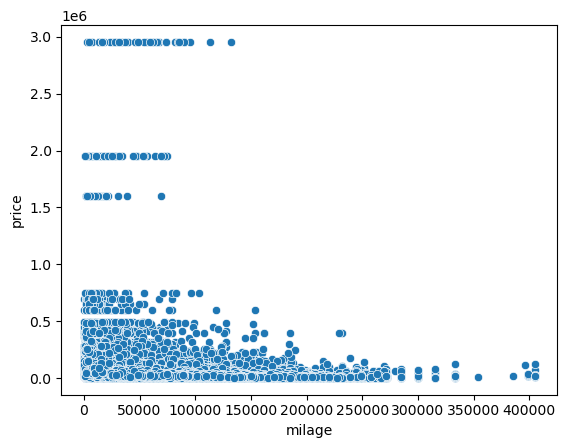

In [47]:
#we can see the impact of basic vintage and  luxrious cars price when comparing their milage
sns.scatterplot(x=train_data_cleaned['milage'],y=train_data_cleaned['price'])

In [48]:
# Group by 'brand' and calculate various statistics for 'price'
brand_stats = train_data_cleaned.groupby('brand')['price'].agg(['mean', 'count', 'min', 'max', 'std'])

# Sort by the mean price in descending order
brand_stats_sorted = brand_stats.sort_values(by='mean', ascending=False)

# Display the detailed statistics
print(brand_stats_sorted)


                        mean  count    min      max            std
brand                                                             
Bugatti        176080.000000      5  75000   259500   80559.338379
Lamborghini    141608.376000    500   4500  1950995  187228.414049
Rolls-Royce    134177.188100    521   4995  1950995  180182.505432
Bentley        125603.946640   1012   2300  2954083  213646.228648
McLaren        116722.409574    188   7950   599000   96885.893423
Ferrari        109615.918819    271   3990   695000  105465.169772
Aston          105740.069444    216   3850  2954083  218239.991785
Rivian          68113.070588     85   5900   188900   38884.668688
Lucid           66349.941176     17   9499   279950   66401.366579
Porsche         65813.648532   9025   2000  1950995  110887.756191
Maserati        56797.172249    836   2300   749950   62083.405772
Maybach         53566.333333      3  15500    90200   37370.602087
Genesis         52206.617433    826   2900  1599000   76061.58

In [49]:
 
train_data_cleaned.groupby('brand')['milage'].mean().sort_values(ascending=False)
#themore luxurious the car the lesser it is driven while the more basic the more it is driven 

brand
Hummer           132893.025243
Suzuki           110572.833333
Mitsubishi       109833.740602
Plymouth         105008.285714
Honda            104744.735777
Saturn           102154.680556
Pontiac          102034.901887
Scion            101488.517544
Chrysler         100874.069264
Mercury           96658.381818
Toyota            96348.711651
MINI              94641.290821
Dodge             93973.509606
Nissan            92044.027149
Acura             90992.451669
Subaru            88268.887769
Maybach           87390.000000
Lexus             86796.254264
Volkswagen        83285.591418
Hyundai           82638.621354
Lincoln           82001.702786
Mazda             81591.359799
Buick             79025.461111
FIAT              78982.864865
Jeep              76420.118762
GMC               76285.731987
INFINITI          73918.197228
Volvo             73819.035061
Ford              73646.281806
Saab              72565.863636
Cadillac          72534.101155
Chevrolet         71310.844496
Ki

<Axes: xlabel='price', ylabel='milage'>

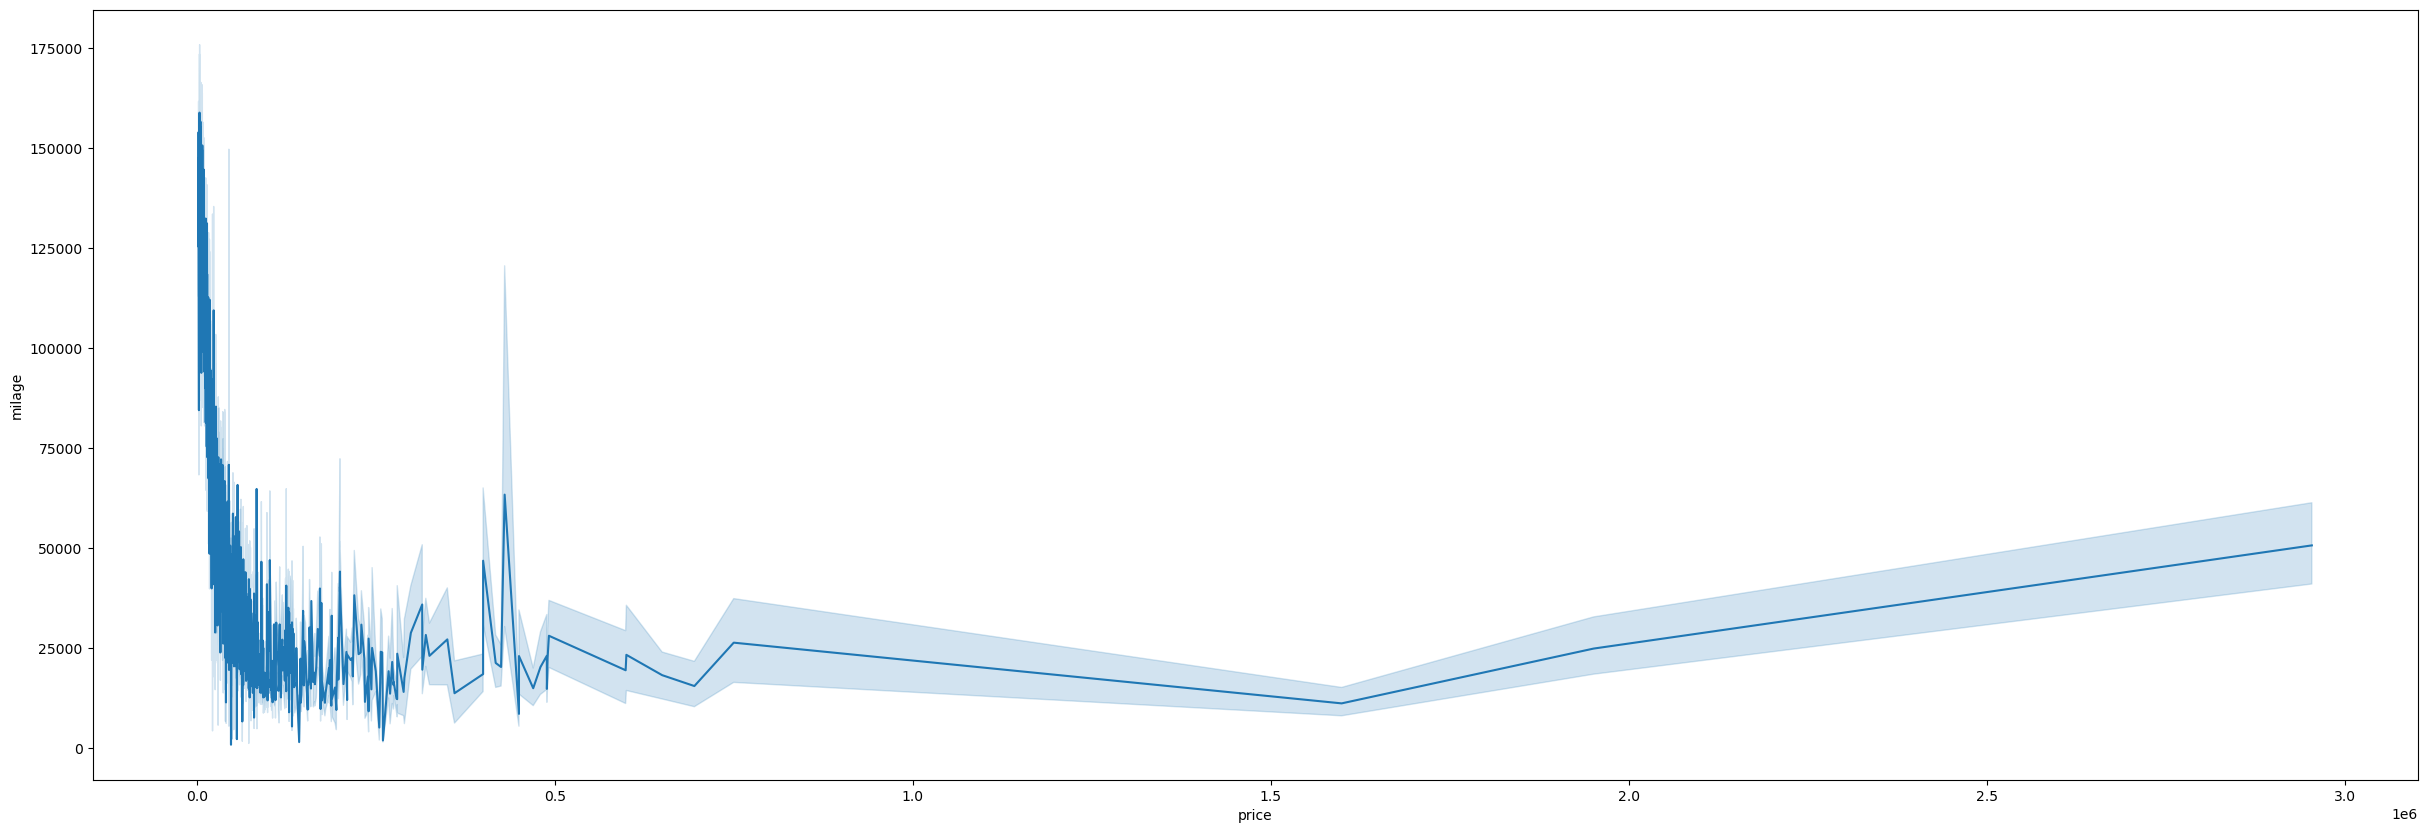

In [50]:
# Set the figure size
plt.figure(figsize=(30, 10)) 
sns.lineplot(x=train_data_cleaned['price'],y=train_data_cleaned['milage'])

looks like the cars towards the left of the curve are luxurious while the ones to right more basic as the ones to the right are having a higher milage and lower price while the ones to  th left of the are showing the exact opposit behaviour 

# From multiple plots its evident that both milage and price are inversly propotional even with the outlirs of luxurious segment 

<Axes: ylabel='price'>

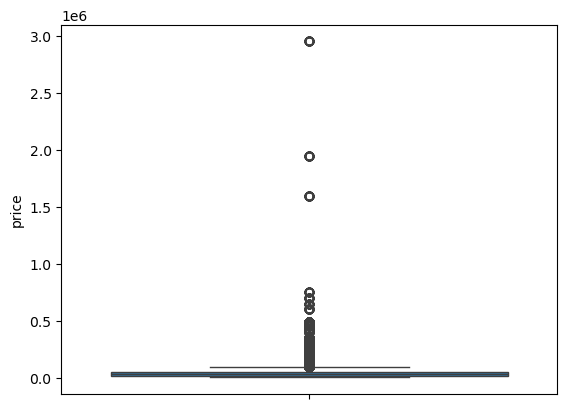

In [51]:
sns.boxplot(train_data_cleaned['price'])

we canobserve that there are outlier that on the higher side of the y axis, meaning again the mixture of
luxurious and normal segment cars does impact the final price, while they may not  exactly be outliers   

 deriving relations btw features or getting insight is  very difficult as the amount of indivisual records over load the visuals presenton the screen for  bar plot or histogram  

C:\Users\DELL\AppData\Local\Temp\ipykernel_11956\3225851592.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=train_data_cleaned['model_year'],hist=False)


<Axes: ylabel='Density'>

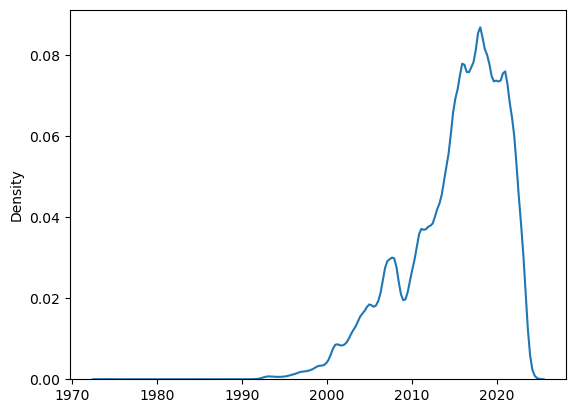

In [52]:
#analysing models according to year of production
sns.distplot(x=train_data_cleaned['model_year'],hist=False)

<Axes: xlabel='accident', ylabel='price'>

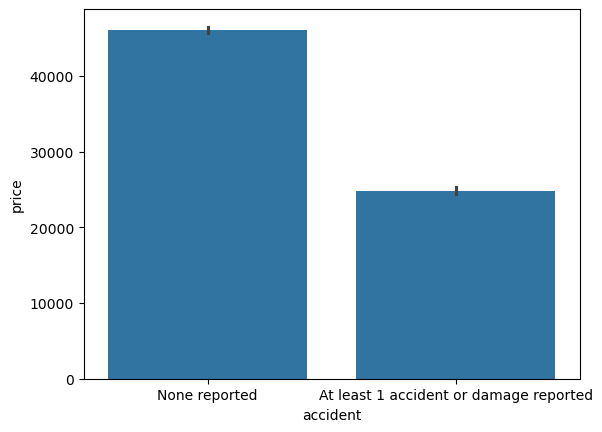

In [53]:
#relation of price with accident 
sns.barplot(x=train_data_cleaned['accident'],y=train_data_cleaned['price'])

### 1. Until now it is evident that , the price of the car is inversly propotional to the milage for both entry level cars and luxurious cars

### 2. The model of the car also has a direct impact on the price as Buggati was having the highest mean price and the nissans and toyota is low

### 3. It can also be noted that there are a direct correletaion btw the price and accidents on the car

<Axes: xlabel='model_year', ylabel='price'>

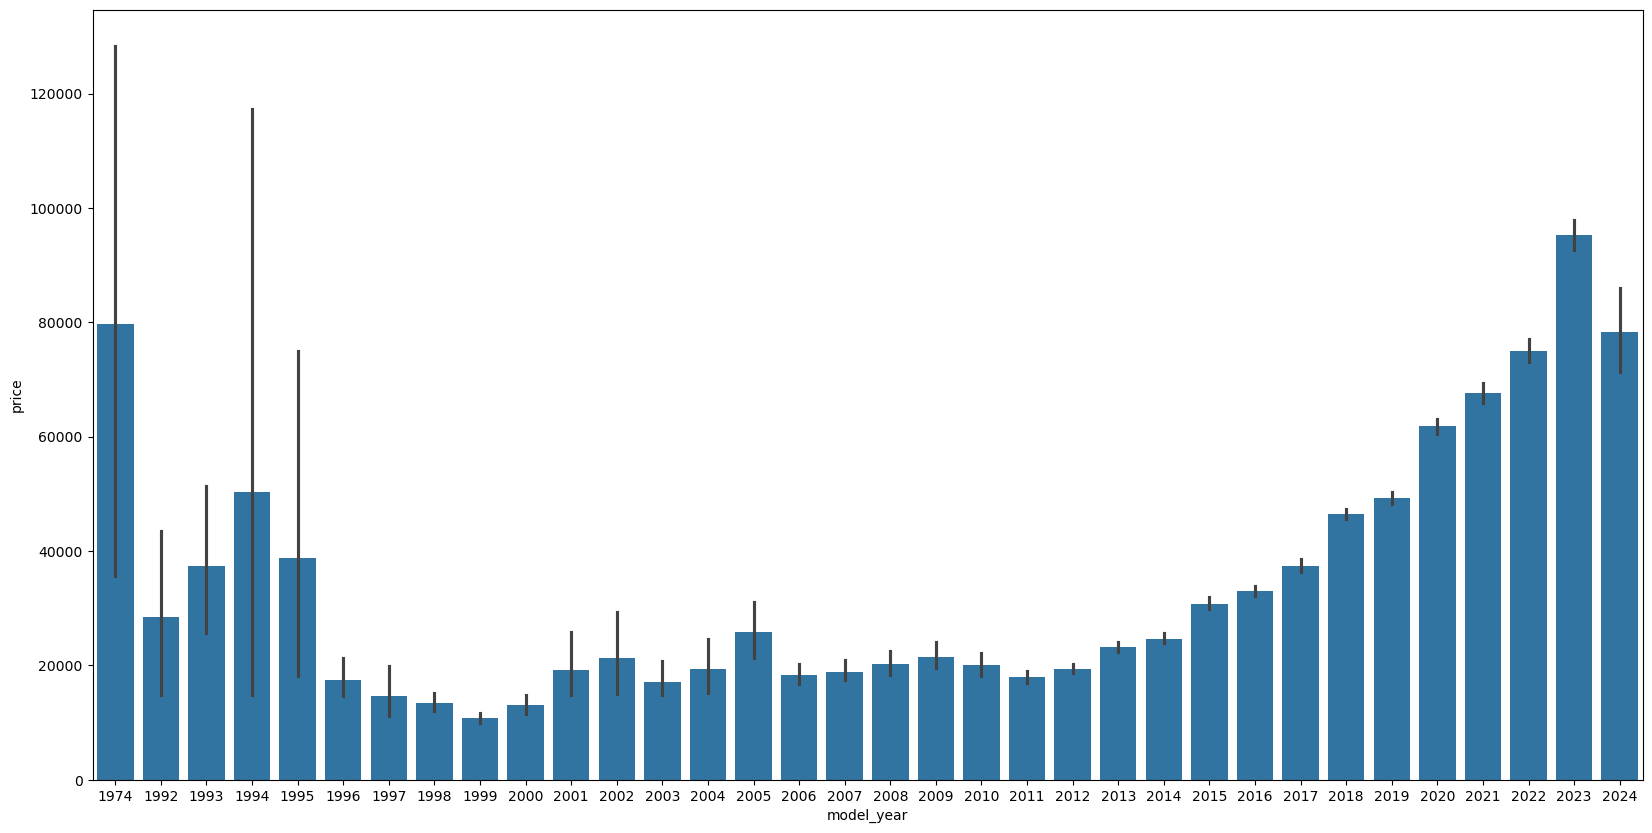

In [54]:
# Comparing pricewith year of production
plt.figure(figsize=(20, 10))  # Width=12, Height=6
sns.barplot(x=train_data_cleaned['model_year'],y=train_data_cleaned['price'])

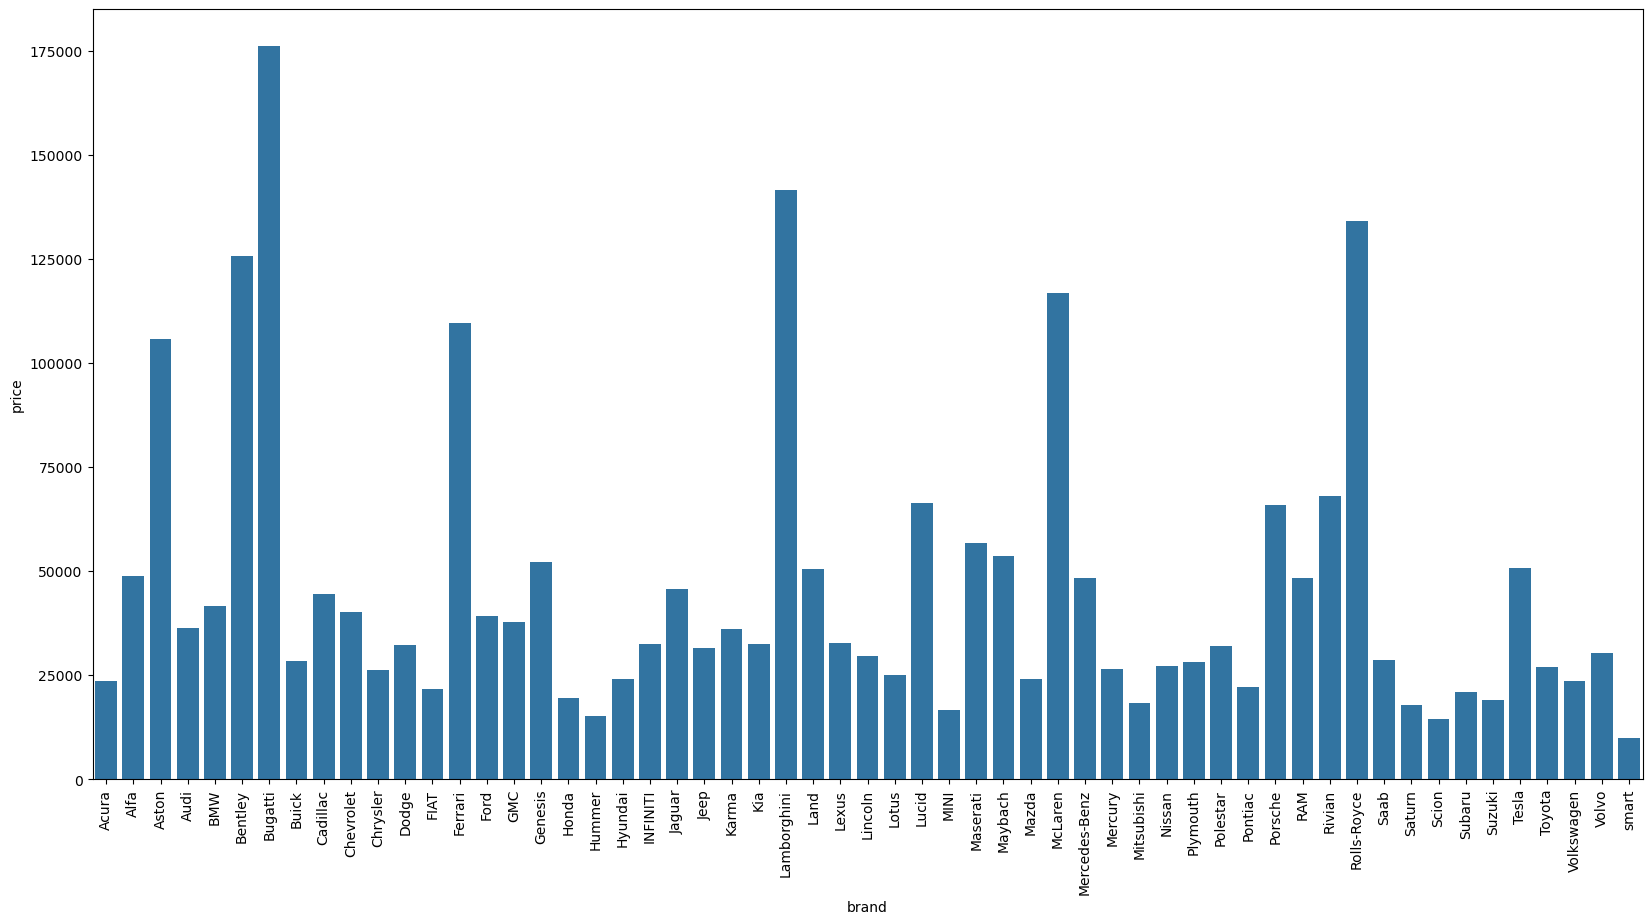

In [55]:
plt.figure(figsize=(20, 10))  # Width=12, Height=6

# Group by 'brand' and calculate the mean of 'price'
grouped_data = train_data_cleaned.groupby('brand')['price'].mean().reset_index()

# Create the barplot using the grouped data
sns.barplot(x=grouped_data['brand'], y=grouped_data['price'])

# Optional: Rotate the x-axis labels if there are many brands
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [57]:
"""
from pandas_profiling import ProfileReport
prof = ProfileReport(train_data_cleaned)
profile.to_file("data_report.html")
""""

SyntaxError: unterminated string literal (detected at line 5) (3698866023.py, line 5)

pandas profiler is not working here....... 
but we can check the sckewness of our data and check  for deviation in our data 

C:\Users\DELL\AppData\Local\Temp\ipykernel_11956\2304936351.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data_cleaned['price'])


<Axes: xlabel='price', ylabel='Density'>

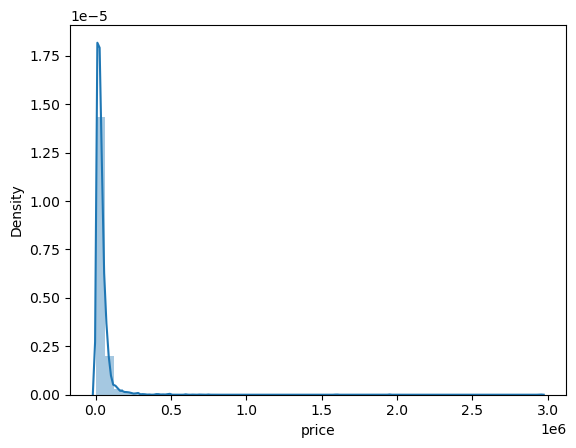

In [58]:
# lets plot price
sns.distplot(train_data_cleaned['price'])

### Price  columb/feature seems to be  skewed so we will  have to fix that before doing hypothesistesting 

Lets try to fix the sckewness using :

1.Log Transformation

2.Box-Cox Transformation


C:\Users\DELL\AppData\Local\Temp\ipykernel_11956\28967436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned['price_log'] = np.log1p(train_data_cleaned['price'])


<Axes: xlabel='price_log', ylabel='Count'>

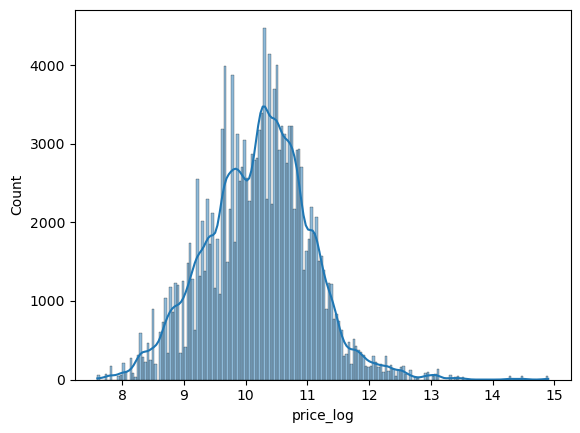

In [59]:
train_data_cleaned['price_log'] = np.log1p(train_data_cleaned['price'])
sns.histplot(train_data_cleaned['price_log'], kde=True)

This does redue the skewness lets check  with Box-Cox Transformation

C:\Users\DELL\AppData\Local\Temp\ipykernel_11956\3602426233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned['price_boxcox'], _ = stats.boxcox(train_data_cleaned['price'] + 1)  # Adding 1 to avoid zero values


<Axes: xlabel='price_boxcox', ylabel='Count'>

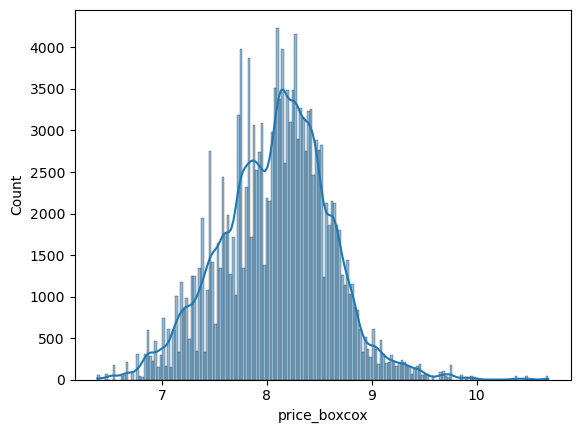

In [60]:
#Box-Cox Transformation:
from scipy import stats
train_data_cleaned['price_boxcox'], _ = stats.boxcox(train_data_cleaned['price'] + 1)  # Adding 1 to avoid zero values
sns.histplot(train_data_cleaned['price_boxcox'], kde=True)


### Both fix the sckewness well so we can go ahead with either of them well be proceeding with price_bocox as final price destrubtion graph

# Hypothesis testing

### Hypothesis 1: Car Accidents Affect Transformed Price

Null Hypothesis (H₀): There is no significant difference in the average transformed price of cars with and without accidents.

Alternative Hypothesis (H₁): Cars with reported accidents have a significantly lower average transformed price than those without accidents.


### Hypothesis 2: Fuel Type Influences Transformed Car Price

Null Hypothesis (H₀): The average transformed price of cars is the same across different fuel types.

Alternative Hypothesis (H₁): The average transformed price of cars significantly differs across fuel types.


### Hypothesis 3: Car Mileage Affects Transformed Price

Null Hypothesis (H₀): There is no significant correlation between car mileage and transformed price.

Alternative Hypothesis (H₁): There is a significant correlation between car mileage and transformed price.


## **Testing these hypotheses on the Box-Cox transformed price data:
1. Test for Car Accidents Affecting Transformed Price (T-test)

In [75]:
'''
from scipy.stats import ttest_ind
alpha = 0.05

# Separate data into two groups: cars with and without accidents
accident_cars = train_data_cleaned[train_data_cleaned['accident']=='None reported']['price_boxcox']
no_accident_cars = train_data_cleaned[train_data_cleaned['accident']=='At least 1 accident or damage reported']['price_boxcox']
accident_cars.count()
no_accident_cars.count()
# Perform independent T-test
t_stat, p_value = ttest_ind(accident_cars, no_accident_cars)

# Display results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in transformed car prices based on accident history.")
else:
    print("Fail to reject the null hypothesis: No significant difference in transformed car prices based on accident history.")
'''

'\nfrom scipy.stats import ttest_ind\nalpha = 0.05\n\n# Separate data into two groups: cars with and without accidents\naccident_cars = train_data_cleaned[train_data_cleaned[\'accident\']==\'None reported\'][\'price_boxcox\']\nno_accident_cars = train_data_cleaned[train_data_cleaned[\'accident\']==\'At least 1 accident or damage reported\'][\'price_boxcox\']\naccident_cars.count()\nno_accident_cars.count()\n# Perform independent T-test\nt_stat, p_value = ttest_ind(accident_cars, no_accident_cars)\n\n# Display results\nprint(f"T-statistic: {t_stat}")\nprint(f"P-value: {p_value}")\n\n# Interpretation\nif p_value < 0.05:\n    print("Reject the null hypothesis: There is a significant difference in transformed car prices based on accident history.")\nelse:\n    print("Fail to reject the null hypothesis: No significant difference in transformed car prices based on accident history.")\n'

In [63]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table using pd.crosstab
contingency_table = pd.crosstab(train_data_cleaned['accident'], train_data_cleaned['price_boxcox'] > train_data_cleaned['price_boxcox'].median())

# Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Display results
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between accident history and transformed car prices.")
else:
    print("Fail to reject the null hypothesis: No significant association between accident history and transformed car prices.")


Chi2 statistic: 10907.023462378165
P-value: 0.0
Reject the null hypothesis: There is a significant association between accident history and transformed car prices.


### The extremely high Chi-square statistic and a p-value of 0.0 are unusual but not necessarily incorrect.

In [68]:
# Inspect Contingency Table
# Expected Frequency

In [70]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(train_data_cleaned['accident'], train_data_cleaned['price_boxcox'] > train_data_cleaned['price_boxcox'].median())

# Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Displaying the contingency table and expected frequencies
print("Contingency Table:")
print(contingency_table)
print("\nExpected Frequencies:")
print(expected)


Contingency Table:
price_boxcox                            False  True 
accident                                            
At least 1 accident or damage reported  29230  10969
None reported                           52262  70149

Expected Frequencies:
[[20145.72847918 20053.27152082]
 [61346.27152082 61064.72847918]]


##### The large discrepancy between observed and expected values is what drives the high Chi-square value (10907.02), which leads to the very small p-value (essentially 0). Therefore, it's correct to reject the null hypothesis, indicating a significant association between accident history and car prices.

## Ignore as conclusion was achive on test case one

In [ ]:
#alternate method as p and t value are null for us in this case 
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
u_stat, p_value = mannwhitneyu(accident_cars, no_accident_cars)

# Display results
print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in transformed car prices based on accident history.")
else:
    print("Fail to reject the null hypothesis: No significant difference in transformed car prices based on accident history.")


**lets check the no of cars with and without a accient**

In [ ]:
print(f"Number of cars with accidents: {accident_cars.count()}")
print(f"Number of cars without accidents: {no_accident_cars.count()}")

In [ ]:
sns.barplot(x=train_data_cleaned['price'],y=train_data_cleaned['accident'])

#### Still  P-value is zero 

In [ ]:
from scipy.stats import ttest_ind

# Ensure there are no NaN values
accident_cars = accident_cars.dropna()
no_accident_cars = no_accident_cars.dropna()

# Perform independent T-test
t_stat, p_value = ttest_ind(accident_cars, no_accident_cars)

# Display results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in transformed car prices based on accident history.")
else:
    print("Fail to reject the null hypothesis: No significant difference in transformed car prices based on accident history.")


In [ ]:
#last try 
from scipy.stats import ttest_ind, mannwhitneyu

# Ensure there are no NaN values
accident_cars = accident_cars.dropna()
no_accident_cars = no_accident_cars.dropna()

# Check basic statistics
print(f"Mean of accident cars: {accident_cars.mean()}")
print(f"Mean of no accident cars: {no_accident_cars.mean()}")

# Perform independent T-test
t_stat, p_value = ttest_ind(accident_cars, no_accident_cars, equal_var=False)  # Welch’s t-test for unequal variance

# Display results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

#### looks like the P-Value zero only moving on 2 second hypothesis 

In [ ]:
# using chi square to test hypothesis for categorical data 



# 2.Test for Fuel Type Affecting Transformed Price (ANOVA)

In [72]:
import pandas as pd
from scipy.stats import chi2_contingency

# Bin transformed prices into categories (e.g., low, medium, high)
train_data_cleaned['price_category'] = pd.qcut(train_data_cleaned['price_boxcox'], q=3, labels=['low', 'medium', 'high'])

# Create a contingency table with fuel_type and the binned price_category
contingency_table = pd.crosstab(train_data_cleaned['fuel_type'], train_data_cleaned['price_category'])

# Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Display results
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between fuel type and transformed car prices.")
else:
    print("Fail to reject the null hypothesis: No significant association between fuel type and transformed car prices.")


Chi2 statistic: 2998.495838536287
P-value: 0.0
Reject the null hypothesis: There is a significant association between fuel type and transformed car prices.


C:\Users\DELL\AppData\Local\Temp\ipykernel_11956\366072573.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned['price_category'] = pd.qcut(train_data_cleaned['price_boxcox'], q=3, labels=['low', 'medium', 'high'])


##### The result indicates a significant association between fuel type and transformed car prices, with a Chi-Square statistic of 2998.50 and a p-value of 0.0, which is less than the conventional threshold of 0.05. Therefore, we reject the null hypothesis, suggesting that fuel type is related to the binned car prices in your dataset.

# **3. Test for Mileage Affecting Transformed Price (Correlation Test)**

In [74]:
import pandas as pd
from scipy.stats import f_oneway

# Correct the SettingWithCopyWarning by using .loc
train_data_cleaned.loc[:, 'mileage_bins'] = pd.cut(train_data_cleaned['milage'], bins=5)

# Group transformed prices by mileage bins
mileage_groups = [group['price_boxcox'].values for name, group in train_data_cleaned.groupby('mileage_bins')]

# Perform ANOVA test
f_stat, p_value = f_oneway(*mileage_groups)

# Display results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in transformed car prices across mileage groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in transformed car prices across mileage groups.")


F-statistic: 26106.7628062415
P-value: 0.0
Reject the null hypothesis: There is a significant difference in transformed car prices across mileage groups.


C:\Users\DELL\AppData\Local\Temp\ipykernel_11956\2061858929.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mileage_groups = [group['price_boxcox'].values for name, group in train_data_cleaned.groupby('mileage_bins')]


# Conclusion:

1. Hypothesis: Car Accidents Affect Transformed Price
Null Hypothesis (H₀): There is no significant difference in the average transformed price of cars with and without accidents.
Alternative Hypothesis (H₁): Cars with reported accidents have a significantly lower average transformed price than those without accidents.

Results:

Chi2 statistic: 10,907.02

P-value: 0.0

Conclusion: There is a significant association between accident history and transformed car prices. Cars with accident history tend to have different prices compared to those without.

2. Hypothesis: Fuel Type Influences Transformed Car Price
Null Hypothesis (H₀): The average transformed price of cars is the same across different fuel types.
Alternative Hypothesis (H₁): The average transformed price of cars significantly differs across fuel types.

Chi2 statistic: 2,998.49

P-value: 0.0

Conclusion: There is a significant association between fuel type and transformed car prices. Different fuel types are associated with varying car prices.

3. Hypothesis: Car Mileage Affects Transformed Price
Null Hypothesis (H₀): There is no significant correlation between car mileage and transformed price.
Alternative Hypothesis (H₁): There is a significant correlation between car mileage and transformed price.

F-statistic: 26,106.76

P-value: 0.0

Conclusion: There is a significant difference in transformed car prices across mileage groups. Mileage significantly affects car prices, with distinct price variations among different mileage groups.

# Summary

Accident History: Significant impact on transformed car prices.

Fuel Type: Significant effect on transformed car prices.

Mileage: Significant negative correlation with transformed car prices.


**These findings indicate that accident history and fuel type both play significant roles in determining the price of cars, and higher mileage is associated with lower prices.**